In [1]:
import sys
sys.path.insert(0, '/gpfs/fs01/user/s3b2-519e0ce881616c-546ab68fb1ed/.local/lib/python2.7/site-packages/')


In [2]:
import sklearn
print sklearn.__version__

0.17


# Spark is at your fingertips if you need it...

In [3]:
sc

In [4]:
import requests, StringIO, pandas as pd, json, re
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import string
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import normalize


In [5]:
# Helper function from BlueMix docs to read in files from the object store

def get_file_content(credentials):
    '''For given credentials, this functions returns a StringIO object containg the file content.'''

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    #print resp1.content
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface'] == 'public') and (e2['region'] == credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [6]:
# Credentials from Data Source --> "Insert to Code" for each file

credentials_a = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'LoanStats3a_securev1.csv',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_b = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'LoanStats3b_securev1.csv',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_c = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'LoanStats3c_securev1.csv',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_d = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'LoanStats3d_securev1.csv',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_pkl = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'model_rf.pkl',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_pp = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'pre_processing.py',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_get_loans = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'get_loans.py',
    'container': 'notebooks',
    'region' : 'dallas'
}

credentials_clean_api = {
    'auth_url': 'https://identity.open.softlayer.com',
    'domain_id': '81085da1a617409193ba3e4feb86d1f9',
    'username': 'admin_ff270a12-49b4-4311-8503-20a2fb53319f_631f9273817c',
    'password': 'PhDA-1aA!P6Lg]ua',
    'filename': 'clean_api_data.py',
    'container': 'notebooks',
    'region' : 'dallas'
}

# Read the data in from the DataSource/ObjectStore

In [7]:
# get content for each data source

content_string_a = get_file_content(credentials_a)
content_string_b = get_file_content(credentials_b)
content_string_c = get_file_content(credentials_c)
content_string_d = get_file_content(credentials_d)
content_model = get_file_content(credentials_pkl)
content_pp = get_file_content(credentials_pp)
content_get_loans = get_file_content(credentials_get_loans)
content_clean_api = get_file_content(credentials_clean_api)

In [26]:
# Load the model!

# model = pickle.load(content_model)

In [8]:
with open('pre_processing.py', 'wb') as f:
    f.write(content_pp.buf)
    f.close()
    
with open('get_loans.py', 'wb') as f:
    f.write(content_get_loans.buf)
    f.close()
    
with open('clean_api_data.py', 'wb') as f:
    f.write(content_clean_api.buf)
    f.close()


In [9]:
import pre_processing as pp
import get_loans
import clean_api_data

# Load the data into a Pandas DataFrame

In [222]:
# content_string is destroyed after reading it into a csv, so be sure to rerun get_file_content
# if you want to reload it into a df 

# df_a = pd.read_csv(content_string_a, skiprows=1, low_memory=False)
# df_b = pd.read_csv(content_string_b, skiprows=1, low_memory=False)
# df_c = pd.read_csv(content_string_c, skiprows=1, low_memory=False)
# df_d = pd.read_csv(content_string_d, skiprows=1, low_memory=False)

# # stick all dfs together into one for ease of analysis

# data = pd.concat([df_a, df_b, df_c, df_d])
df = data.copy()

In [223]:
# Quick check that we have about 750K rows to make sure that we loaded all of the expected loans

df.shape

(756891, 60)

# Let's explore the data and get a sense of what we have

In [224]:
#df.info()

In [225]:
# get rid of the last two rows that have non numeric string ids
def drop_bad_ids(df):
    return df[df['id'].str.contains(r'[^\d.]+') == False]

In [226]:
df = drop_bad_ids(df)

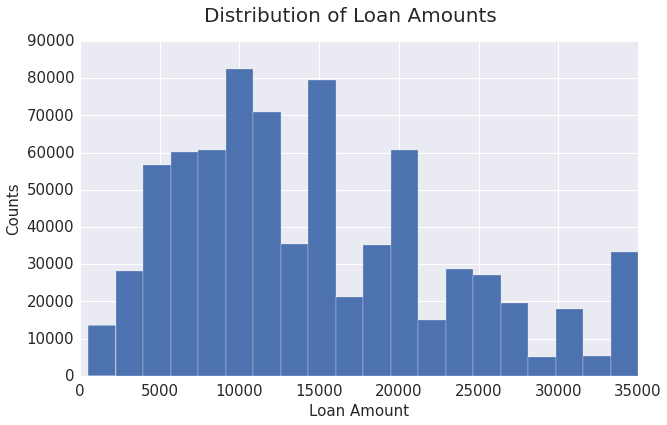

In [227]:
plt.figure(figsize=(10, 6))
df.loan_amnt.hist(bins=20)
plt.suptitle('Distribution of Loan Amounts', size=20)
plt.xlabel("Loan Amount", size=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylabel("Counts", size=15)
plt.show()

### It looks like most loans tend to be under 15K, and for amounts over 10K people prefer to take out loans in increments of 5K

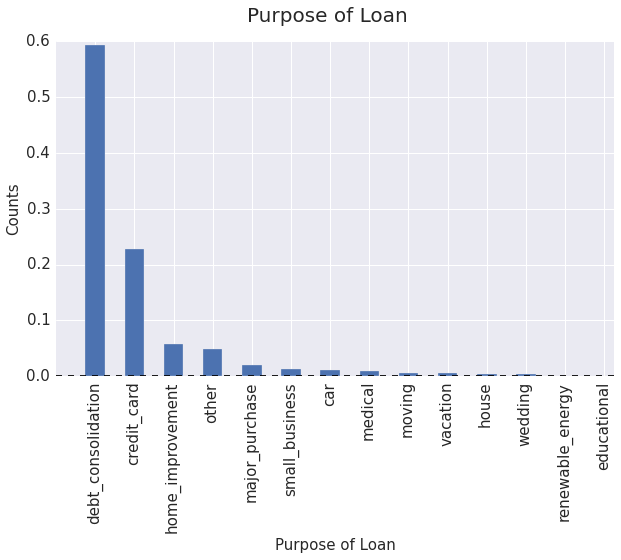

In [228]:
plt.figure(figsize=(10, 6))
(df.purpose.value_counts() / len(df)).plot(kind='bar')
plt.suptitle('Purpose of Loan', size=20)
plt.xlabel("Purpose of Loan", size=15)
plt.ylabel("Counts", size=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### The vast majority (~80% of all loans are for debt consolidation or credit cards). With about %5 each for home improvement and 'other'

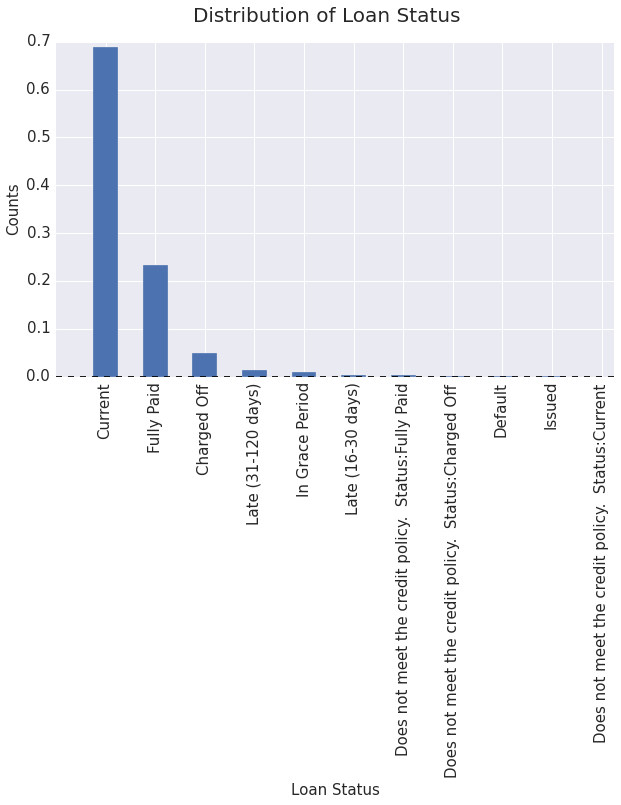

In [229]:
plt.figure(figsize=(10, 6))
(df.loan_status.value_counts() / len(df)).plot(kind='bar')
plt.suptitle('Distribution of Loan Status', size=20)
plt.xlabel("Loan Status", size=15)
plt.ylabel("Counts", size=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### We are interested in the loans that have are in their "end state", i.e. they are either "Fully Paid" or "Charged Off", so will end up discarding the loans that are "Current" because they don't tell us much about that we want to know. Less than 5% of all loans are in a "Default" or "Charged Off" status, and about 25% are are "Fully Paid"  about 5 fully paid loan for every 1 that is charged off.

In [230]:
# Drop those loans that are current, late, or in grace period.
# We only want the ones that are Fully Paid, Charged Off, or in Default 
# The rest are one that in progress

bad_loans = ['Current', 'Does not meet the credit policy.  Status:Current',
            'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Issued']

df = df[~df.loan_status.isin(bad_loans)]
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

df.shape

(217165, 60)

### This filters out about 540,000 loans. But still enough to -- hopefully -- build a good model.

In [231]:
paidInFull = df[df.loan_status == 0].index
chargedOff = df[df.loan_status == 1].index

### Plot the loan amounts by Status to see if there are any readily apparent differences

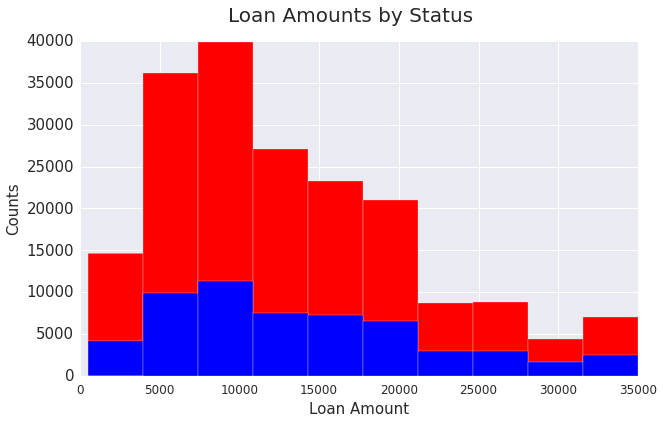

In [232]:

plt.figure(figsize=(10, 6))
df['loan_amnt'][df.index.isin(paidInFull)].hist(color='red')
df['loan_amnt'][df.index.isin(chargedOff)].hist(color='blue')
plt.suptitle('Loan Amounts by Status', size=20)
plt.xlabel("Loan Amount", size=15)
plt.ylabel("Counts", size=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=15)
plt.show()

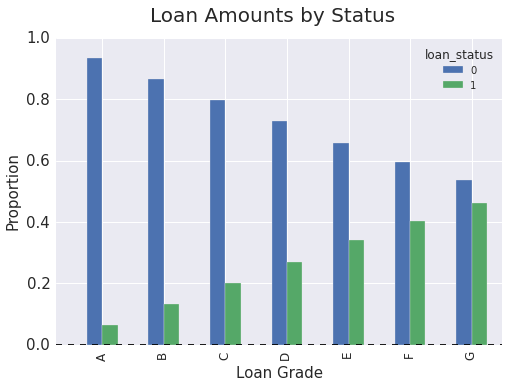

In [233]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.grade, df.loan_status).apply(lambda x: x / sum(x), axis=1).plot(kind='bar')
plt.suptitle('Loan Amounts by Status', size=20)
plt.xlabel("Loan Grade", size=15)
plt.ylabel("Proportion", size=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=15)
plt.show()

## Let's do some data cleaning

In [234]:
# Delete the columns that have only one value or are all NA

del df['policy_code']
del df['verification_status_joint']
del df['pymnt_plan']
del df['application_type']

del df['mths_since_last_major_derog'] # all NA values
del df['annual_inc_joint'] # all NA values
del df['dti_joint'] # all NA values
del df['initial_list_status'] # only one value

## We dropped 8 columns that were unpopulated or did not contain any useful information

In [235]:
df.shape

(217165, 52)

## Define some helper functions to see how many values are missing in the dataset 

In [236]:
def getPercentNull(df, col):
    return df[col].isnull().sum() / float(len(df))

def checkForMissingVals(df, threshold):
    colsWithLotsNA = []
    colsWithSomeNA = []
    for col in df.columns:
        percentMissing = getPercentNull(df, col)
        if percentMissing > threshold:
            colsWithLotsNA.append((col, percentMissing))
        elif (percentMissing > 0) and (percentMissing < threshold):
            colsWithSomeNA.append((col, percentMissing))
            
    return colsWithLotsNA, colsWithSomeNA

## We need to determine if these NA values are missing at random or not

In [237]:
colsWithLotsNA, colsWithSomeNA = checkForMissingVals(df, 0.001)

In [238]:
colsWithSomeNA

[('annual_inc', 1.8419174360509291e-05),
 ('title', 5.986231667165519e-05),
 ('delinq_2yrs', 0.00013353901411369235),
 ('earliest_cr_line', 0.00013353901411369235),
 ('inq_last_6mths', 0.00013353901411369235),
 ('open_acc', 0.00013353901411369235),
 ('pub_rec', 0.00013353901411369235),
 ('revol_util', 0.00099003062187737428),
 ('total_acc', 0.00013353901411369235),
 ('last_credit_pull_d', 7.8281491032164478e-05),
 ('collections_12_mths_ex_med', 0.00066769507056846172)]

## Impute missing values

In [239]:
df.annual_inc.describe()

count     217161.000000
mean       72014.728481
std        60462.185955
min         1896.000000
25%        45000.000000
50%        61462.000000
75%        86000.000000
max      8706582.000000
dtype: float64

In [240]:
# Fill missing income value with the median
df['annual_inc'] = df['annual_inc'].fillna(np.mean(df.annual_inc))

# Fill missing title with the loan_purpose column, since that is the only
# column that gives any information about what this acutal use of the loan is
#df['title'] = df[df['title'].isnull()].apply(lambda row: row[18], axis=1)

# Filter out the reminaing approx 20 rows with missing values
df = df[df['delinq_2yrs'].notnull()]
df = df[df['inq_last_6mths'].notnull()]
df = df[df['open_acc'].notnull()]
df = df[df['pub_rec'].notnull()]
df = df[df['revol_util'].notnull()]
df = df[df['total_acc'].notnull()]

In [241]:
df['emp_title'] = df.emp_title.fillna('None')

In [242]:
# We lost about 3300 instances -- an acceptable amount

df.shape

(216950, 52)

In [243]:
#df.info()

In [244]:
# let's keep the id column for refering back to any specific loans later on
# need to convert it to an int

df['id'] = df['id'].astype(int)

In [245]:
# There may be some predictive signal in zip_code or emp_title -- we can experiment with those later
# The rest are probably not useful

del df['zip_code']
del df['member_id']
del df['emp_title']
del df['url'] # this is not useful
del df['title'] # drop this in favor of the more organized 'purpose' col

## Let's go back to the columns with significant numbers of missing values

In [246]:
colsWithLotsNA

[('emp_title', 0.05476020537379412),
 ('desc', 0.61420578822554284),
 ('mths_since_last_delinq', 0.56514631731632625),
 ('mths_since_last_record', 0.87857619782193264),
 ('last_pymnt_d', 0.0021826721617203507),
 ('next_pymnt_d', 0.98649414040015659)]

## We can impute null fields for user supplied free text with an empty string

In [247]:
df['desc'] = df['desc'].fillna('')

## Next_pymnt_d should be nearly all Null because these loans are in -- or just about in -- their endstate.

## Last_pymnt_date must be dropped because we will not have access to this data for unseen data

In [249]:
del df['next_pymnt_d']
del df['last_pymnt_d']

##  Mths_since_last_delinq and mths_since_last_record have a significant percentage of missing records 

## We cannot just throw them out without considering if the NA values are missing at random or not

In [250]:

delinqs_NA = df['loan_status'][df['mths_since_last_delinq'].isnull()]
delinqs_notNA = df['loan_status'][df['mths_since_last_delinq'].notnull()]

records_NA = df['loan_status'][df['mths_since_last_record'].isnull()]
records_notNA = df['loan_status'][df['mths_since_last_record'].notnull()]

print "Proportion of delinq missing in default is: ", delinqs_NA.mean()
print "Proportion of delinq not missing in default is: ", delinqs_notNA.mean()
print "\n"
print "Proportion of records missing in default is: ", records_NA.mean()
print "Proportion of records not missing in default is: ", records_notNA.mean()

Proportion of delinq missing in default is:  0.185340467878
Proportion of delinq not missing in default is:  0.192456069695


Proportion of records missing in default is:  0.186684436143
Proportion of records not missing in default is:  0.201092523045


## To see if this is a significant difference we will do a test for a difference in two means

In [252]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(delinqs_NA, delinqs_notNA)

print "For mths_since_last_delinq", "t-stat is: ", t_stat, "p-value is: ", p_value
print "\n"
t_stat, p_value = ttest_ind(records_NA, records_notNA)

print "For mths_since_last_record", "t-stat is: ", t_stat, "p-value is: ", p_value

For mths_since_last_delinq t-stat is:  -4.2016825454 p-value is:  2.65044225405e-05


For mths_since_last_record t-stat is:  -5.60716406478 p-value is:  2.05917800256e-08


## In both cases the difference in means is significant, which means that values are not missing at random. 

## This means that we need to come up with a creative way to impute them

In [253]:
# Let's start with something not very creative to get a simple model working

# Impute the missing values with the mean... we can try something else later

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df.mths_since_last_delinq.mean())
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df.mths_since_last_record.mean())

In [254]:
# Now, we will clean up a few other fields that look interesting
# Start with the employment field by creating a procedure to extract 
# the yrs of employment length as an int

def clean_employment_length(string):
    stop_words = ['<', '+', 'years', 'year']
    if string == 'n/a':
        return 0
    for word in stop_words:
        string = string.replace(word, '')
    return int(string)

# Remove unwanted characters and convert to floats
df['emp_length'] = df['emp_length'].apply(clean_employment)
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1]))
df['term'] = df['term'].apply(lambda x: 36 if '36' in x else 60)

## A careful reading of the data documentation allows to see which features contain information that is added after a loan is ussed. 

## To avoid information leakage from the taget we will drop several features that contains information about the future

In [256]:
del df['out_prncp']
del df['out_prncp_inv']
del df['total_pymnt']
del df['total_pymnt_inv']
del df['total_rec_prncp']
del df['total_rec_int']
del df['total_rec_late_fee']
del df['recoveries']
del df['collection_recovery_fee']
del df['last_pymnt_amnt']
del df['last_fico_range_low']
del df['last_fico_range_high']
del df['last_credit_pull_d']
del df['collections_12_mths_ex_med']

print df.shape

(216950, 31)


## Some simple feature engineering

## Let's convert the time related features into something that we can use in a classifier

In [257]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# these dates are now expressed in number of days of credit_length or
# number of days between loan issue and the first lending club loan

df['credit_length'] = (df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'D')
df['issue_d'] = (df['issue_d'] - pd.to_datetime('2007-08-01')) / np.timedelta64(1, 'D')

# Now drop the redundant features

del df['earliest_cr_line']

## Make a description length feature

In [258]:
df['desc_length'] = df['desc'].apply(lambda x: len(x))
del df['desc']

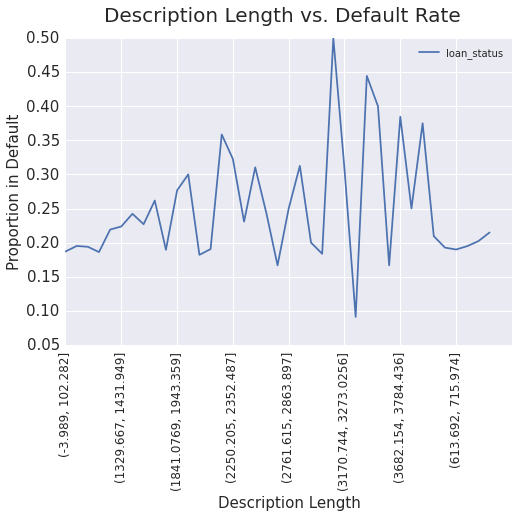

In [259]:
plt.figure(figsize=(10, 6))
df['desc_cut'] = pd.cut(df['desc_length'], bins=df.desc_length.max()/100.0)
df[['loan_status', 'desc_cut']].groupby('desc_cut').mean().plot(label='Default Rate')
plt.suptitle('Description Length vs. Default Rate', size=20)
plt.xticks(label='Description Length', rotation='vertical')
plt.xlabel("Description Length", size=15)
plt.ylabel("Proportion in Default", size=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=15)
plt.show()

In [260]:
# Create a mean fico score feature

df['fico_mean'] = df[['fico_range_low', 'fico_range_high']].mean(axis=1)
del df['fico_range_low']
del df['fico_range_high']

## Let's do a quick exploration of the relationship between sub_grade and int_rate

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [332]:
dataForPlot = data[['sub_grade', 'int_rate']].dropna()
subGradeEncoder = LabelEncoder()
subGradeEncoder.fit(sorted(dataForPlot.sub_grade.unique()))

X = subGradeEncoder.transform(dataForPlot.sub_grade)
y = dataForPlot.int_rate.apply(lambda x: float(x[:-1]))

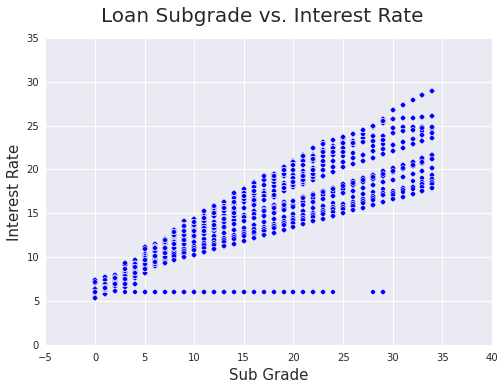

In [336]:
plt.scatter(X, y)
plt.suptitle('Loan Subgrade vs. Interest Rate', size=20)
plt.xlabel('Sub Grade', size=15)
plt.ylabel('Interest Rate', size=15)
plt.show()

In [311]:
sample = np.random.randint(0, len(df), 10000)

X = pd.get_dummies(data.ix[sample].sub_grade)
y = data.ix[sample].int_rate.apply(lambda x: float(x[:-1]))

In [315]:
lm = LinearRegression()
lm.fit(X, y)
print "R-squared is: ", r2_score(y, lm.predict(X))

 R-squared is:  0.957102202764


In [261]:
# Here are some other features that I thought might be useful

# These good_states and bad_states are based on looking at the respective defautl rates
# Probably should test those default rates for statistical significance

bad_states = ['FL', 'AK', 'MO', 'MS', 'MT', 'NV', 'SD']
good_states = ['DC' 'WY']

df['is_bad_state'] = df['addr_state'].apply(lambda x: 1 if x in bad_states else 0)
df['is_good_state'] = df['addr_state'].apply(lambda x: 1 if x in good_states else 0)

dummies_t = pd.get_dummies(df['term'])
dummies_v = pd.get_dummies(df['verification_status'])
dummies_sg = pd.get_dummies(df['sub_grade'])

dummies = pd.concat([dummies_t, dummies_v, dummies_sg], axis=1)
del df['addr_state']
df = pd.concat([df, dummies], axis=1)

df['is_small_business'] = df['purpose'].apply(lambda x: 1 if x=="small_business" else 0)
df['is_educational'] = df['purpose'].apply(lambda x: 1 if x=="educational" else 0)
df['is_homeowner_other'] = df['home_ownership'].apply(lambda x: 1 if x=='other' else 0)
del df['grade']
del df['sub_grade']
del df['term']
del df['home_ownership']
del df['verification_status']
del df['purpose']

## We want to select features for our model, so let's vizualize some of the pairwise relationships

In [262]:
!pip install --user seaborn

You are using pip version 7.1.0, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [263]:
import seaborn as sns

In [288]:
plot_cols = df[['funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'loan_status']]

In [289]:
sample = np.random.randint(0, len(df), size=10000)

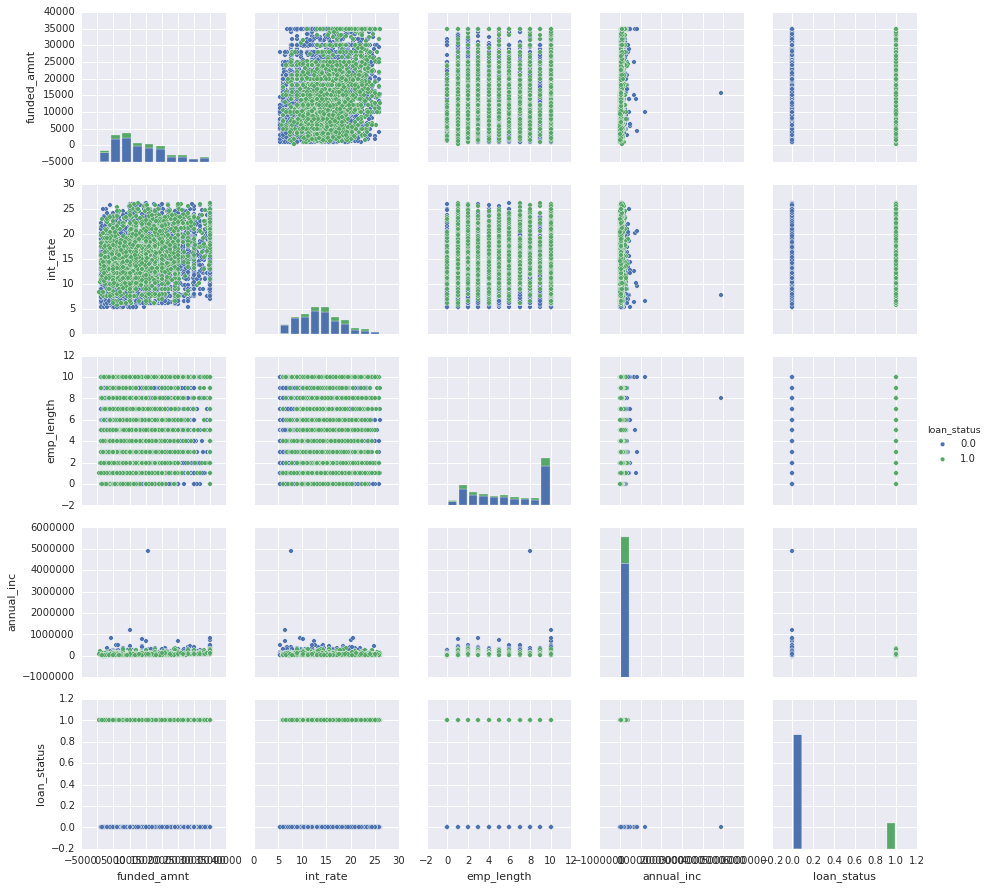

In [290]:
sns.set()
sns.pairplot(plot_cols.ix[sample], hue='loan_status')

plt.xticks(rotation=90)
plt.yticks(rotation='horizontal')

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.show()


# Model Building

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split


In [268]:
# Create a working data set and a holdout data set

y = df['loan_status']
X = df.drop(['loan_status', 'desc_cut'], axis=1)

# Create a holdout set for further testing and simlations

X_data, X_holdout, y_data, y_holdout = train_test_split(X, y, test_size=0.1)

In [269]:
X_data.shape, X_holdout.shape, y_data.shape, y_holdout.shape,  

((195255, 67), (21695, 67), (195255,), (21695,))

In [270]:
# From the working set create the training set and the testing set

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

## Logistic Regression

In [273]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print "Logistic Classifier ROC-AUC: ", roc_auc_score(y_test, lr.predict(X_test))


Logistic Classifier ROC-AUC:  0.583241578309


## KNN w/ PCA (n=10)

In [272]:
# knn kind of sucks, so we'll try some dimensionality reduiction to see if we can get
# these points closer together by trx'ing them to lower n space

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
p = pca.fit_transform(normalize(X_train))


normed_X_test = pca.transform(normalize(X_test))


for k in range(3, 10):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knn.fit(p, y_train)
    print "Number of neighbors:", k, "ROC-AUC:", roc_auc_score(y_test, knn.predict(normed_X_test))
    
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn.fit(p, y_train)

Number of neighbors: 3 ROC-AUC: 0.520158347558
Number of neighbors: 4 ROC-AUC: 0.510645165018
Number of neighbors: 5 ROC-AUC: 0.519875134184
Number of neighbors: 6 ROC-AUC: 0.51212142412
Number of neighbors: 7 ROC-AUC: 0.516736019206
Number of neighbors: 8 ROC-AUC: 0.511063634356
Number of neighbors: 9 ROC-AUC: 0.515880523792


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Random Forest

In [211]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, class_weight={1.0:10.0}, n_jobs=-1)
rf.fit(X_train, y_train)
print roc_auc_score(y_test, rf.predict(X_test))

0.66790505952


## Horserace the different models and plot the ROC curve of each

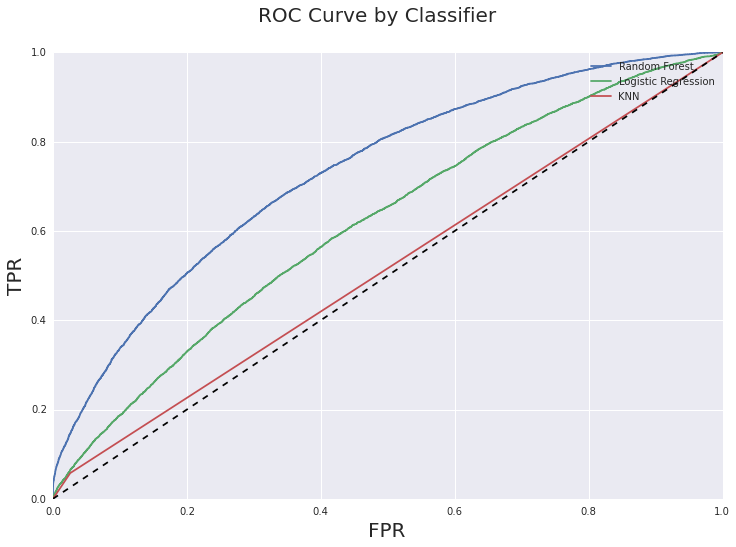

In [218]:
preds_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, preds_rf)

preds_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, preds_lr)

preds_knn = knn.predict_proba(normed_X_test)[:,1]
normed_X_test = pca.transform(normalize(X_test))
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict(normed_X_test))

plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.suptitle('ROC Curve by Classifier', size=20)
plt.xlabel("FPR", size=20)
plt.ylabel("TPR", size=20)
plt.legend()


## Not great =( 
## But Random Forest is a clear winner

In [219]:
from sklearn.externals import joblib

In [285]:
!mkdir model

In [287]:
joblib.dump(rf, 'model/rf_model.pkl')
print "pickled!"

pickled!


In [280]:
num_words = data['desc'].fillna('').apply(lambda x: len(x.split()))

In [284]:
len(num_words[num_words > 100])

9475